# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
The dataset provided by Pymaceuticals contains information about the mouse ID, timepoints, drug regimens, tumor volumes, and other variables.
Here are some key analysis points for the Pymaceuticals dataset:
Tumor Volume Analysis:
The tumor volume was measured for each mouse at different timepoints during the study.
The data can be analyzed to track the changes in tumor volume over time for each drug regimen.
Statistical measures such as mean, median, variance, standard deviation, and SEM can be calculated to understand the distribution and variability of tumor volume for different drug regimens.
Treatment Regimen Analysis:
Pymaceuticals conducted the study using various drug regimens such as Capomulin, Ramicane, Infubinol, and Ceftamin.
The effectiveness of each drug regimen can be analyzed by comparing the changes in tumor volume, survival rates, and other relevant factors.
Survival Rate Analysis:
The survival rate of mice can be analyzed based on the number of surviving mice at each timepoint for different drug regimens.
The survival curves for each drug regimen can be plotted to compare the effectiveness of the treatments in prolonging the survival of mice.
Metastatic Site Analysis:
The presence of metastatic sites in mice can be analyzed to understand the spread of cancer cells.
Gender Analysis:
The distribution of male and female mice in the study can be analyzed to observe any gender-based differences in tumor growth, treatment response, or survival rates.
Statistical Analysis and Visualization:
Statistical tests such as t-tests or ANOVA can be performed to compare the effectiveness of different drug regimens.
Visualizations such as line plots, bar plots, box plots, and scatter plots can be created to present the findings and trends in an easily understandable manner. Which concluded that there
is a positive correlation using the drug regimen Campumolin to treat tumors in mice.


In [551]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
print(mouse_metadata_complete)



     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [493]:
# Checking the number of mice.
mouse_count = mouse_metadata_complete["Mouse ID"].nunique()
mouse_count

249

In [494]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_mice = mouse_metadata_complete.loc[duplicates, "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [372]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [579]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_metadata_complete.loc[mouse_metadata_complete['Mouse ID'] != 'g989']
clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_stats = mouse_metadata_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats.columns = [" ".join(col).strip() for col in drug_regimen_stats.columns.values]

# Display the summary statistics table
drug_regimen_stats


,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) var,Tumor Volume (mm3) std,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_regimen_stats = mouse_metadata_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_stats 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

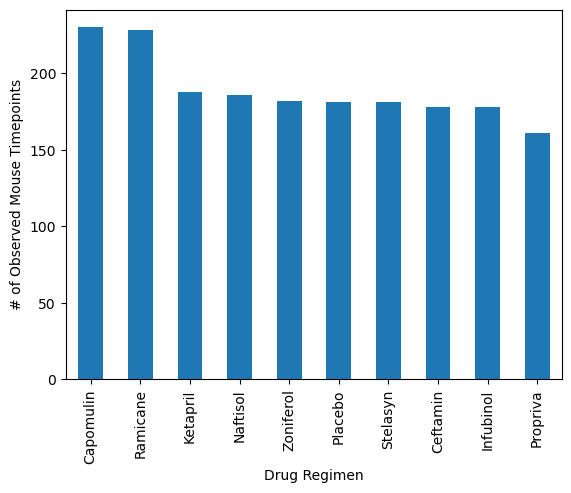

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_stats = mouse_metadata_complete.groupby("Drug Regimen")["Mouse ID"].count()

# Sort the data in descending order
drug_regimen_stats = drug_regimen_stats.sort_values(ascending=False)

# Create a bar plot
drug_regimen_stats.plot(kind="bar")

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


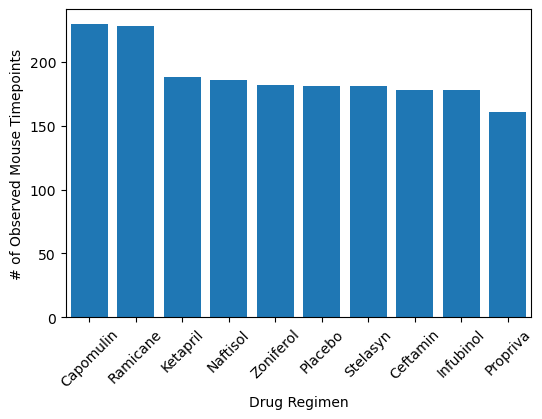

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# calculate the count of Mouse ID for each of the Drug Regimen
drug_regimen_stats = mouse_metadata_complete.groupby("Drug Regimen")["Mouse ID"].count()

# Sort the data in descending order
drug_regimen_stats = drug_regimen_stats.sort_values(ascending=False)

# Set the figure size and also create a bar plot
plt.figure(figsize=(6,4))
# create a bar plot
drug_regimen_stats.plot(kind="bar")
plt.bar(drug_regimen_stats.index, drug_regimen_stats.values)

# Setting the title and axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


[Text(0, 0.5, 'Sex')]

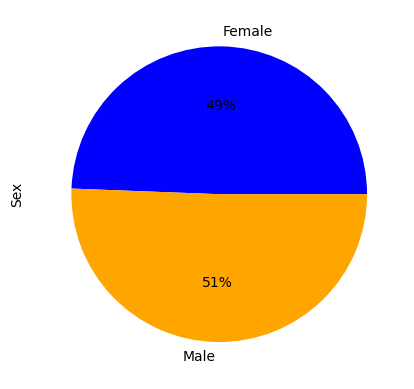

In [581]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

merged_df = pd.merge(mouse_metadata, study_results)

# Group the merged dataframe by sex
grouped_df = merged_df.groupby(['Sex']).count()

# Rename the column to "Number of Data Points"
grouped_df = grouped_df.rename(columns={'Mouse ID': 'Number of Data Points'})

# Generate the pie chart
ax = grouped_df.plot.pie(y='Number of Data Points', autopct="%.0f%%", 
                         title="", legend=False, 
                         colors=["blue", "orange"])
ax.set(ylabel="Sex")



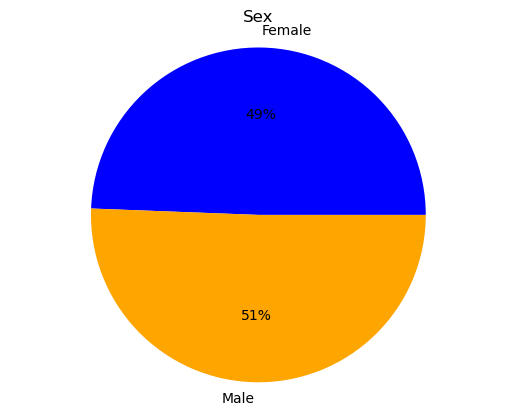

In [586]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mca_db = pd.merge(mouse_metadata, study_results)
# mouse_metadata_complete = pd.merge(mouse_metadata, study_results)

# Group the merged dataframe by sex
mca_db = mouse_metadata_complete.groupby(['Sex'])
datas = mca_db.count()
column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})

# Create label and axis
plt.pie(datas['Number of Data Points'], labels=datas.index, autopct="%.0f%%", colors=["blue", "orange"])
plt.title(pie_title)
plt.axis('equal')
ax.set(ylabel="Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [510]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Creating a list of treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the DataFrame to only include the four treatment regimens
filtered_df = mouse_metadata_complete[mouse_metadata_complete["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(max_timepoints, filtered_df, on=["Mouse ID", "Timepoint"])
                                                            
# Selecting the columns we need (Mouse ID, Drug Regimen, and Tumor Volume)
final_volume_df = final_volume_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_volume_df.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [542]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Loop through each treatment regimen
for treatment in treatments:
    
    # Get the last (greatest) timepoint for each mouse for the current treatment
    max_timepoints = mouse_metadata_complete.loc[mouse_metadata_complete['Drug Regimen'] == treatment].groupby('Mouse ID')['Timepoint'].max()

    # Merge the timepoints with the original dataset to get the tumor volume at the last timepoint for each mouse
    merged_df = pd.merge(mouse_metadata_complete, max_timepoints, on=['Mouse ID', 'Timepoint'])

    # Get the tumor volume data for the current treatment
    tumor_vol = merged_df["Tumor Volume (mm3)"]

    # Add the tumor volume data to the list for plotting
    tumor_vols.append(tumor_vol.values)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Print out any outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


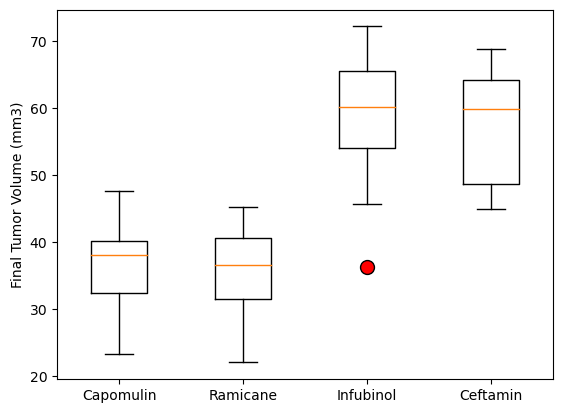

In [550]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Define the desired order of drug regimens
drug_regimen_order = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a dictionary for tumor volume for each treatment group
treatment_groups = {}

# Create a figure and axis
fig1, ax = plt.subplots()

marker = dict(marker="o", markeredgecolor="black",markerfacecolor="red",markersize=10)
ax.boxplot(tumor_vols,flierprops=marker)

# Set the x-axis labels
ax.set_xticklabels(drug_regimen_order)

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

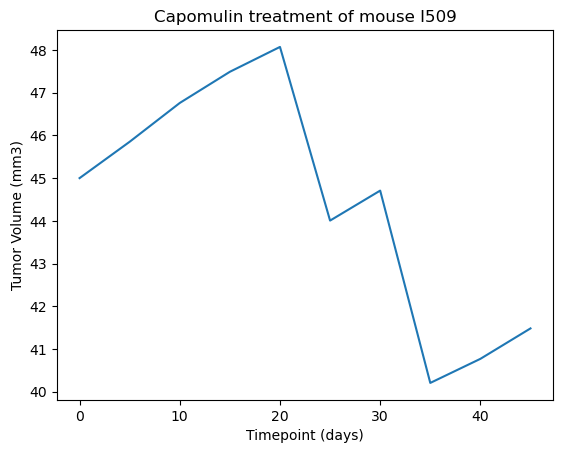

In [587]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
mouse_id = "l509"

# Filter the data for the selected mouse and Capomulin treatment
selected_mouse_data = mouse_metadata_complete.loc[(mouse_metadata_complete["Mouse ID"] == mouse_id) & (mouse_metadata_complete["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker="")

# Set the plot title and axis labels
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


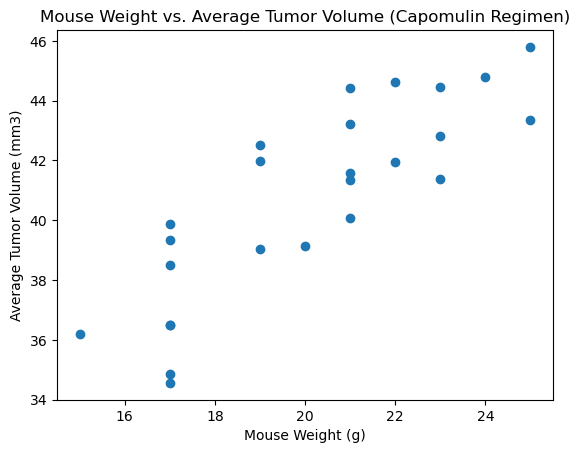

In [475]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin regimen
capomulin_data = mouse_metadata_complete[mouse_metadata_complete["Drug Regimen"] == "Capomulin"]

# Calculating the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Set the plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

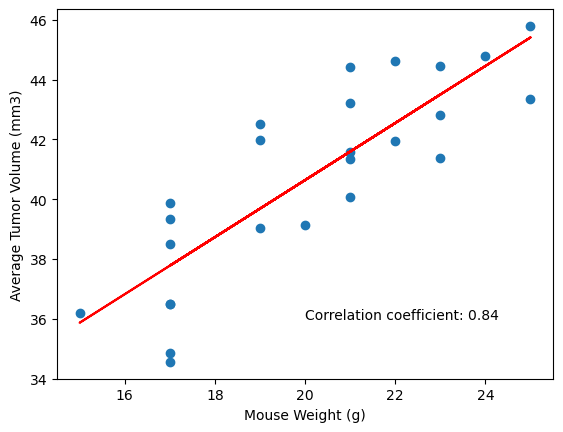

In [486]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = mouse_metadata_complete[mouse_metadata_complete["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Calculate the correlation coefficient
correlation = mouse_weights.corr(average_tumor_volume)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weights, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Add the linear regression line to the plot
regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, color='red')

# Set the plot title and axis labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the correlation coefficient on the plot
plt.text(20, 36, f"Correlation coefficient: {correlation:.2f}", fontsize=10)

# Show the plot
plt.show()



